#### Update 11/22/2022:
- removed a data row from the dataset with "." for hpi (house price index), which can not be converted from string to float
- added regression tree model
- other formatting...

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib
import os
import matplotlib.pyplot as plt

# Dataset Preparation
from sklearn.model_selection import train_test_split

# Linear/Logistic Regression Model
import statsmodels.formula.api as smf

# CART Basics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree

# Classification Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Regression Tree
from sklearn.tree import DecisionTreeRegressor

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

# Performance interval estimation
#import bootstrapped.bootstrap as bs
#import bootstrapped.stats_functions as bs_stats

In [2]:
def read_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
path = os.path.realpath(os.path.join(os.getcwd() , '..', 'data_for_training', 'BEV_data_w_hpi.csv'))

In [4]:
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zip code                    402 non-null    int64  
 1   number_registration         402 non-null    int64  
 2   Population                  402 non-null    int64  
 3   household count             402 non-null    int64  
 4   <10,000                     402 non-null    float64
 5   10,000~14,999               402 non-null    float64
 6   15,000~24,999               402 non-null    float64
 7   25,000~34,999               402 non-null    float64
 8   35,000~49,999               402 non-null    float64
 9   50,000~74,999               402 non-null    float64
 10  75,000~99,999               402 non-null    float64
 11  100,000~149,999             402 non-null    float64
 12  150,000~199,999             402 non-null    float64
 13  >200,000                    402 non

In [6]:
data = data[data['housing_price_index'] != "."]
data['housing_price_index'] = data['housing_price_index'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 401
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zip code                    401 non-null    int64  
 1   number_registration         401 non-null    int64  
 2   Population                  401 non-null    int64  
 3   household count             401 non-null    int64  
 4   <10,000                     401 non-null    float64
 5   10,000~14,999               401 non-null    float64
 6   15,000~24,999               401 non-null    float64
 7   25,000~34,999               401 non-null    float64
 8   35,000~49,999               401 non-null    float64
 9   50,000~74,999               401 non-null    float64
 10  75,000~99,999               401 non-null    float64
 11  100,000~149,999             401 non-null    float64
 12  150,000~199,999             401 non-null    float64
 13  >200,000                    401 non

In [7]:
y = data["number_registration"]
X = data.drop(['number_registration',"zip code" ], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=88)

In [8]:
X_train.head()

,Population,household count,"<10,000","10,000~14,999","15,000~24,999","25,000~34,999","35,000~49,999","50,000~74,999","75,000~99,999","100,000~149,999","150,000~199,999",">200,000",EV charging station number,housing_price_index
374,25906,14729,4.3,0.2,3.6,5.4,9.7,15.6,17.4,21.2,12.1,10.6,190,1441.22
264,19090,8169,7.3,6.8,9.5,13.1,14.7,21.2,9.9,11.4,3.8,2.1,5,779.55
383,32349,9918,11.2,6.5,15.3,13.9,18.3,14.6,9.6,6.9,1.7,2.0,25,436.73
246,36731,13332,6.6,5.9,12.7,12.1,14.7,19.8,12.5,11.3,2.6,1.9,8,505.34
208,24912,9631,7.6,4.9,12.8,12.7,15.1,21.3,10.3,9.1,4.1,2.3,56,1176.36


In [9]:
data['housing_price_index'][0]

290.76

In [10]:
def OSR2(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    return (1- SSE/SST)

### GradientBoostingRegressor

In [11]:
reg = GradientBoostingRegressor(random_state=88)
reg.fit(X_train, y_train)
print("Gradient Boosting OSR2:", OSR2(reg, X_test, y_test, y_train))

Gradient Boosting OSR2: 0.9071676870142483


### Classification Tree 


In [12]:
bev_data = data.copy(deep=True)

In [13]:
bev_data['class'] = np.zeros(len(bev_data))
for i in bev_data.index:
    if bev_data['number_registration'][i] < 50:
        bev_data['class'][i] = 'A'
    
    elif bev_data['number_registration'][i] < 200:
        bev_data['class'][i] = 'B'
    elif bev_data['number_registration'][i] < 400:
        bev_data['class'][i] = 'C'
    else:
        bev_data['class'][i] = 'D'

/tmp/ipykernel_224/3672186880.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bev_data['class'][i] = 'A'
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
y = bev_data['class']
X = bev_data.drop(['class', 'zip code', 'number_registration'], axis=1)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size = 0.3, random_state = 88)

In [15]:
dtc = DecisionTreeClassifier(class_weight = 'balanced',
                             min_samples_leaf= 3,
                             min_samples_split= 2,
                              random_state = 88)
cv = KFold(n_splits= 10, random_state= 88, shuffle = True)
grid_values = {'ccp_alpha': np.linspace(0,1,2001)}

dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=0)


dtc_cv_acc = dtc_cv_acc.fit(X_train_class, y_train_class)

y_pred_class = dtc_cv_acc.predict(X_test_class)
cm = confusion_matrix(y_test_class, y_pred_class)

print ("Confusion Matrix : \n", cm) 
print('Precision:',precision_score(y_test_class, y_pred_class, average = 'weighted'))
print('Recall:',recall_score(y_test_class, y_pred_class, average = 'weighted'))

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])

Confusion Matrix : 
 [[38  3  0  0]
 [ 8 26 12  0]
 [ 0  3 10  2]
 [ 0  0  3 16]]
Precision: 0.7779624306304148
Recall: 0.743801652892562


/tmp/ipykernel_224/2822207193.py:21: RuntimeWarning: invalid value encountered in long_scalars
  TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])


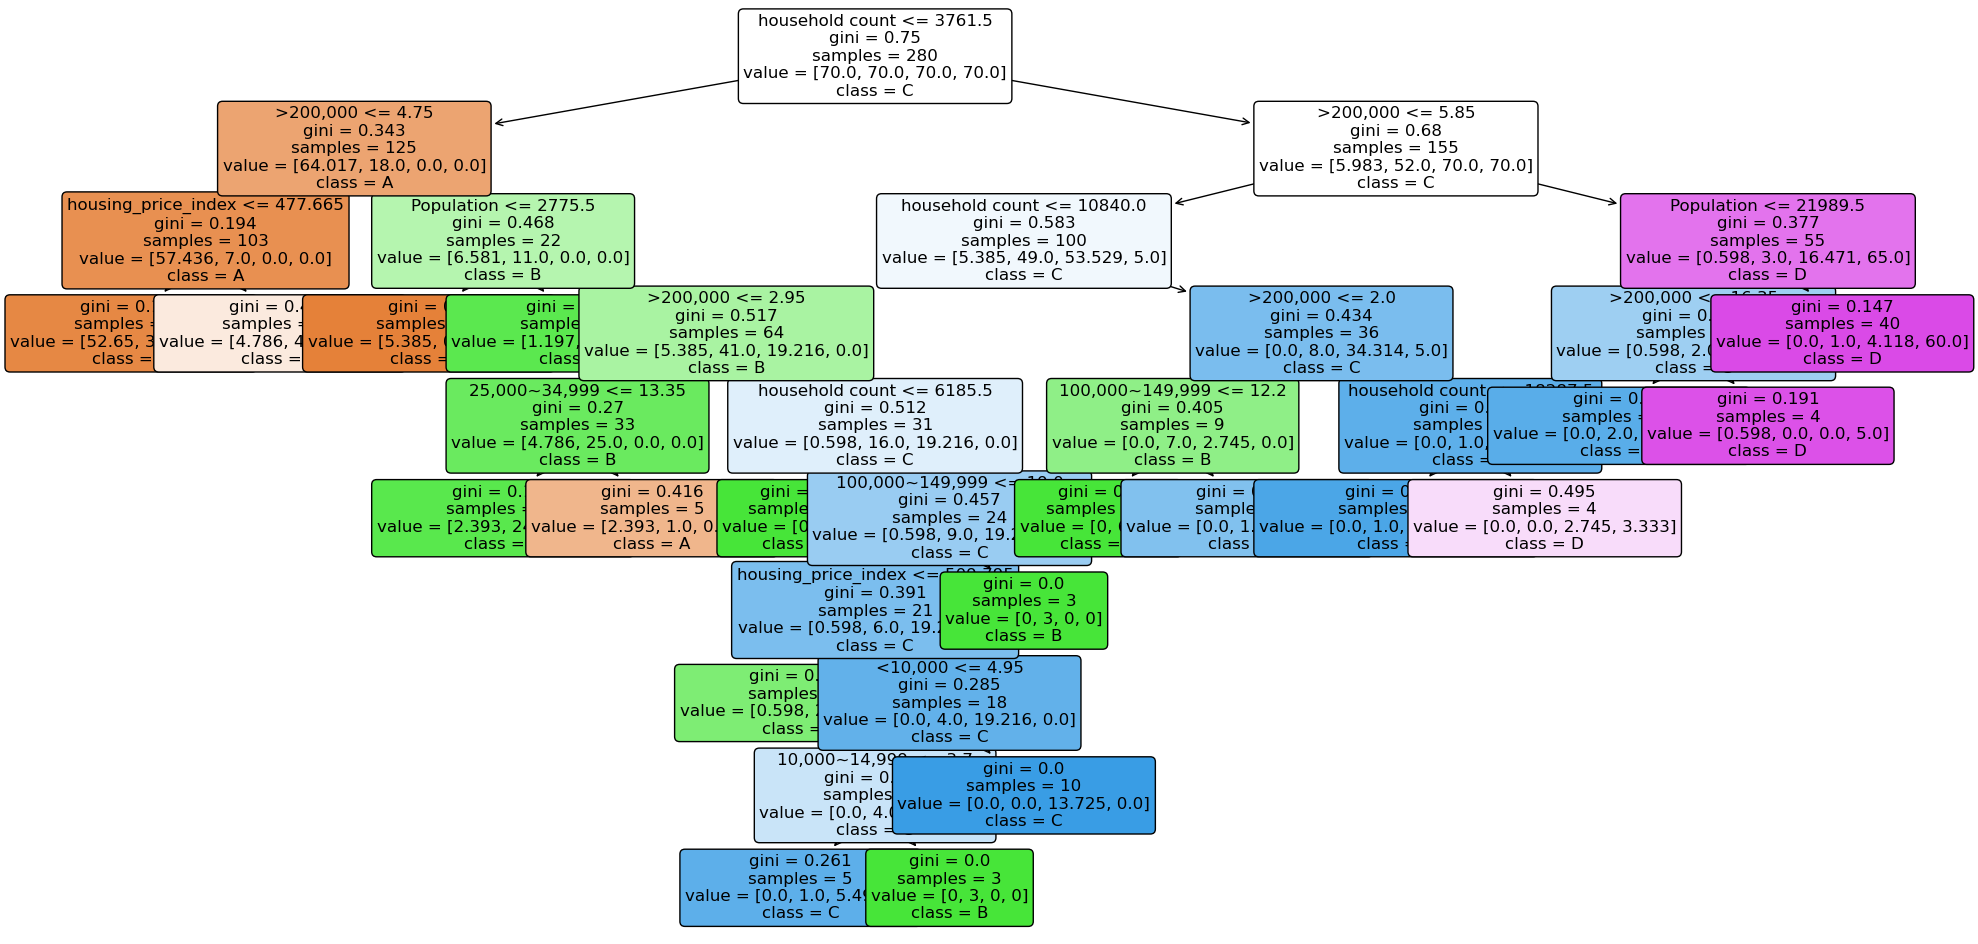

In [16]:
plt.figure(figsize=(24,12))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train_class.columns, 
          class_names=['A','B','C','D'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) #,max_depth=3)   # how deep to show
plt.show()

In [17]:
# Accessing model best accuracy based on cross-validated results
model_acc = dtc_cv_acc.best_score_ # TODO: calculate CV CART accuracy
print(f'Classification Tree Accuracy: {model_acc:.4f}')

Classification Tree Accuracy: 0.7393


### Regression Tree

In [18]:
# set up cross validation for regression tree

grid_values = {'ccp_alpha': np.linspace(0, 1, 2001),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

            
dtr = DecisionTreeRegressor()
dtr_cv_acc = GridSearchCV(dtr, param_grid = grid_values, cv=10, verbose=0, scoring = 'r2')
dtr = dtr_cv_acc.fit(X_train, y_train)

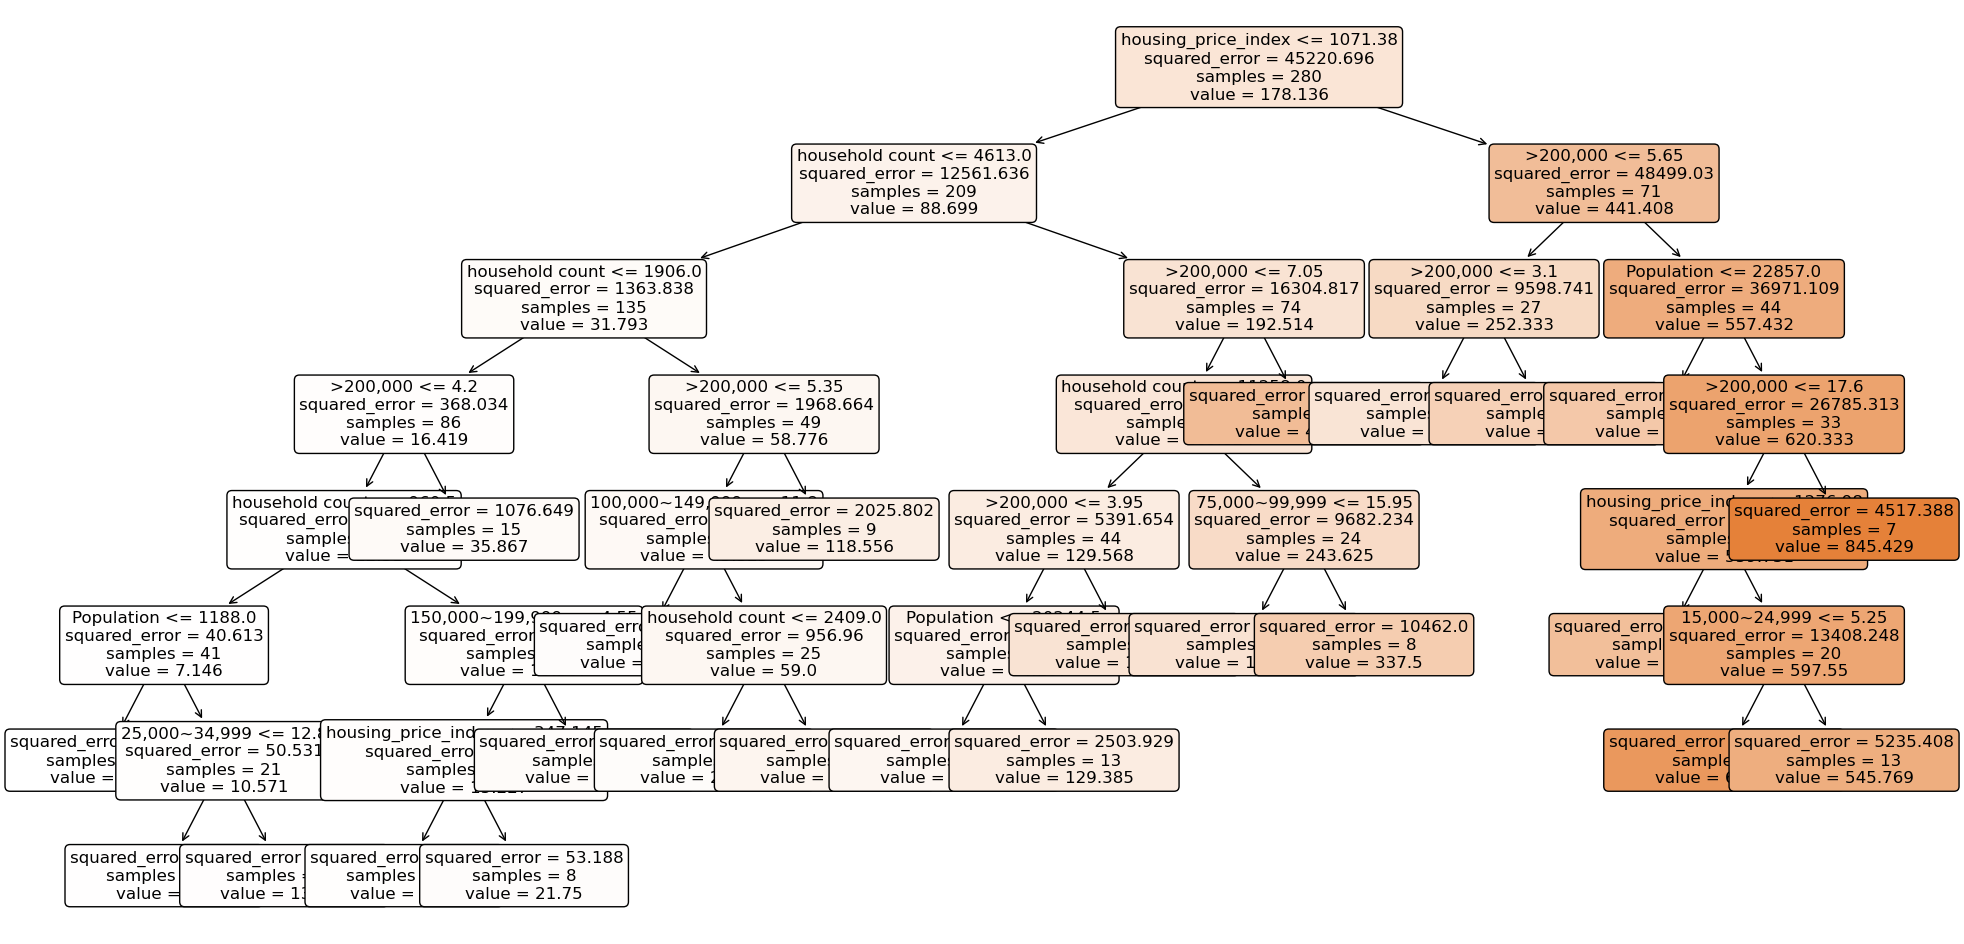

In [19]:
plt.figure(figsize=(24,12))
plot_tree(dtr_cv_acc.best_estimator_, 
          feature_names=X_train.columns,
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) #,max_depth=3)   # how deep to show
plt.show()

In [20]:
print("Regression Tree OSR2: ",OSR2(dtr, X_test, y_test, y_train))

Regression Tree OSR2:  0.8433480736524078
